In [2]:
### Week 11 Code


## Code Courtesy: "An introduction to Facebook ad analysis using R" Kaggle kernel by ChrisBow
## For more information, please visit: https://www.kaggle.com/chrisbow/an-introduction-to-facebook-ad-analysis-using-r/data


##Dataset Courtesy: https://www.kaggle.com/loveall/clicks-conversion-tracking


##IMPORTANT NOTE - dplyr is extensively used as a part of this code. Please check for dplyr learning resources in R Learning Guide
#previously provided. 
#Strong Recommendation - http://rpubs.com/justmarkham/dplyr-tutorial and corresponding Video - https://www.youtube.com/watch?v=jWjqLW-u3hc&t=1511s
#You will be comfortable with most dplyr verbs 20-25 mins into the video. We will be discussing the code in more detail in TA hours
#Your future assignments will involve a bit of dplyr coding questions - it is a very good tool for data wrangling. We encourage you to 
#learn it in some capacity.


#Setting the working directory. Change to your local directory where you download the dataset
setwd("C:/Users/Will/Desktop/School/ISYE 6203/Module 11 - Marketing Analytics")


#DataExplorer package for exploratory data analysis 
#Useful Documentation- https://cran.r-project.org/web/packages/DataExplorer/vignettes/dataexplorer-intro.html
if (!require(DataExplorer)) install.packages("DataExplorer")
library(DataExplorer)

#dplyr - Data Wrangling Package. Check R Learning Guide for resources to quickly learn dplyr
if (!require(dplyr)) install.packages("dplyr")
library(dplyr)


Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
#Download this dataset and place it in your working directory
data <- read.csv("KAG_conversion_data.csv",stringsAsFactors = FALSE)

head(data)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
2,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
3,708771,916,103920,30-34,M,20,693,0,0.00,1,0
4,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
5,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
6,708820,916,103929,30-34,M,29,1915,0,0.00,1,1


In [9]:
#Dataset manipulation
#Drop fb_campaign_id
data<- data %>% select(-fb_campaign_id)
#rename xyz_campaign_id
data<- data %>% rename(campaign_id=xyz_campaign_id)



head(data)

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,708746,916,30-34,M,15,7350,1,1.43,2,1
2,708749,916,30-34,M,16,17861,2,1.82,2,0
3,708771,916,30-34,M,20,693,0,0.00,1,0
4,708815,916,30-34,M,28,4259,1,1.25,1,0
5,708818,916,30-34,M,28,4133,1,1.29,1,1
6,708820,916,30-34,M,29,1915,0,0.00,1,1


In [ ]:
#Check the data dictionary provided with the code for meanings of various columns


#Columns: 
#
#1.) ad_id: unique ID for each ad. Acts as primray key/sole identifier for that ad 
#
#2.) campaign_id: an ID associated with each ad campaign of a company.
#
#3.) age: age of the person to whom the ad is shown.
#
#4.) gender: gender of the person to whom the add is shown
#
#5.) interest: a code specifying the category to which the person's interest belongs (interests are as mentioned in the person's Facebook public profile).
#
#6.) Impressions: the number of times the ad was shown.
#
#7.) Clicks: number of clicks on for that ad.
#
#8.) Spent: Amount paid by a company to Facebook, to show that ad.
#
#9.) Total conversion: Total number of people who enquired about the product after seeing the ad.
#
#10.) Approved conversion: Total number of people who bought the product after seeing the ad.


In [10]:
## Quickly exploring the dataset


#How many facebook ads do we have? 
length(data$ad_id)
#1143


#How many unique facebook ad campaigns are there?
length(unique(data$campaign_id))
#3


#What age groups were ads targeted at? 
unique(data$age)
# 30-34 35-39 40-44 45-49


#Genders - 
unique(data$gender)
#M F


#Quick glimpse at the data and data types
glimpse(data)

[1] 1143

[1] 3

[1] "30-34" "35-39" "40-44" "45-49"

[1] "M" "F"

Rows: 1,143
Columns: 10
$ ad_id               <int> 708746, 708749, 708771, 708815, 708818, 708820, 70…
$ campaign_id         <int> 916, 916, 916, 916, 916, 916, 916, 916, 916, 916, …
$ age                 <chr> "30-34", "30-34", "30-34", "30-34", "30-34", "30-3…
$ gender              <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", …
$ interest            <int> 15, 16, 20, 28, 28, 29, 15, 16, 27, 28, 31, 7, 16,…
$ Impressions         <int> 7350, 17861, 693, 4259, 4133, 1915, 15615, 10951, …
$ Clicks              <int> 1, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 0, 7, 0, 1,…
$ Spent               <dbl> 1.43, 1.82, 0.00, 1.25, 1.29, 0.00, 4.77, 1.27, 1.…
$ Total_Conversion    <int> 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Approved_Conversion <int> 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,…


In [11]:
### Gender and Age are Factors. Let us change them into integer data as: 
# replace character string age ranges with number (average age of the range)
#(It is neccessary to convert them into categorical/numerical variables for groupby analysis)
data$age[data$age == '30-34'] <- 32
data$age[data$age == '35-39'] <- 37
data$age[data$age == '40-44'] <- 42
data$age[data$age == '45-49'] <- 47


In [12]:
# convert variable to integer
data$age <- as.integer(data$age)

In [13]:
# convert gender variable to integer
data$gender[data$gender == 'M'] <- 0
data$gender[data$gender == 'F'] <- 1
data$gender <- as.integer(data$gender)


In [14]:
#Checking for missing data
sapply(data,function(x) sum(is.na(x)))
#What does above command do? 
#Above command simultaneously checks no of NA values in all columns of dataset "data"
#For eg: running sum(is.na(data$gender)) gives number of NA values in "gender" column of data.
#We want to do this for all columns without running it manually. sapply() helps apply a function 
#to each column of a dataset. 

ad_id         campaign_id                 age              gender 
                  0                   0                   0                   0 
           interest         Impressions              Clicks               Spent 
                  0                   0                   0                   0 
   Total_Conversion Approved_Conversion 
                  0                   0

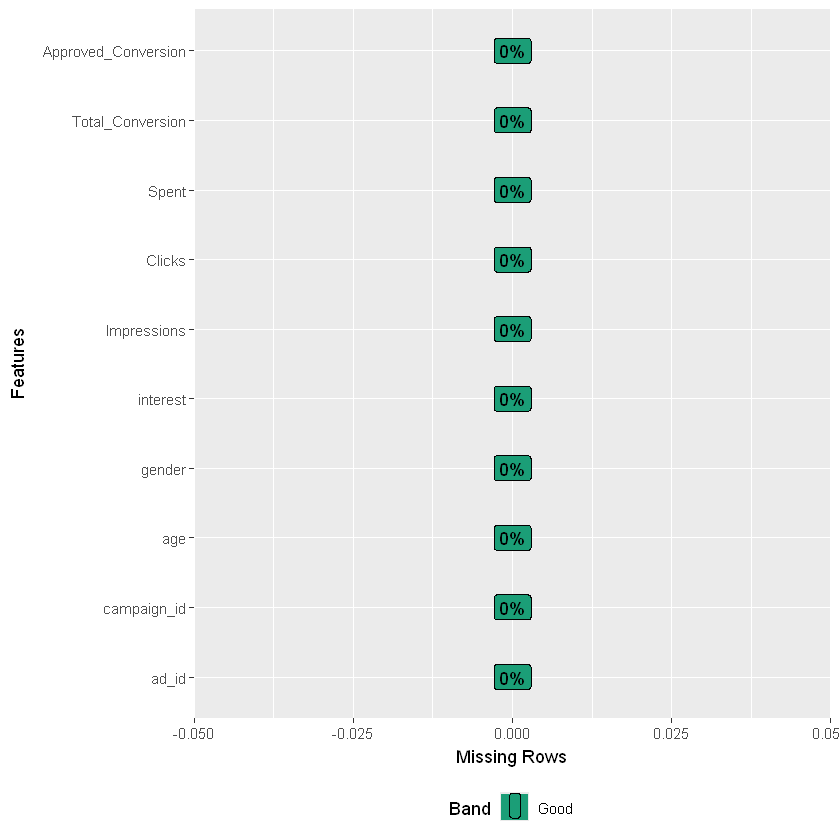

In [15]:
#Easier Alternative way to check for missing data (using Data Explorer Package)
plot_missing(data)


In [16]:
#Descriptive Statistics of the dataset
summary(data)


     ad_id          campaign_id        age            gender      
 Min.   : 708746   Min.   : 916   Min.   :32.00   Min.   :0.0000  
 1st Qu.: 777633   1st Qu.: 936   1st Qu.:32.00   1st Qu.:0.0000  
 Median :1121185   Median :1178   Median :37.00   Median :0.0000  
 Mean   : 987261   Mean   :1067   Mean   :38.32   Mean   :0.4821  
 3rd Qu.:1121805   3rd Qu.:1178   3rd Qu.:42.00   3rd Qu.:1.0000  
 Max.   :1314415   Max.   :1178   Max.   :47.00   Max.   :1.0000  
    interest       Impressions          Clicks           Spent       
 Min.   :  2.00   Min.   :     87   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.00   1st Qu.:   6504   1st Qu.:  1.00   1st Qu.:  1.48  
 Median : 25.00   Median :  51509   Median :  8.00   Median : 12.37  
 Mean   : 32.77   Mean   : 186732   Mean   : 33.39   Mean   : 51.36  
 3rd Qu.: 31.00   3rd Qu.: 221769   3rd Qu.: 37.50   3rd Qu.: 60.02  
 Max.   :114.00   Max.   :3052003   Max.   :421.00   Max.   :639.95  
 Total_Conversion Approved_Conversion
 Mi

In [ ]:
##### Creating Additional Useful Features


#1) Click-through-rate (CTR). This is the percentage of how many of our impressions became clicks. 
#A high CTR is often seen as a sign of good creative being presented to a relevant audience. 
#A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or 
#presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of 
#advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.


#2) Cost Per Click (CPC). Self-explanatory this one: how much (on average) did each click cost. 
#While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with 
#other variables. For example, a campaign with an average CPC of �0.5 and a CR of 5% is 
#likely achieving more with its budget than one with a CPC of �0.2 and a CR of 1% (assuming the conversion value is the same.




#3) Cost per Conversion (CostPerConv_Total). This is the cost per 'conversion'. What a conversion is will be
#determined by the objectives of the campaign. It could be a partial sale, someone completing a contact form on a landing page,
#downloading an e-book, watching a video, or simply spending more than a particular amount of time or 
#viewing over a target number of pages on a website.


#4) Cost per Approved Conversion (CostPerConv_Approved). This is the cost per approved conversion (guaranteed sale).


#5) Cost per mille: Cost Per Mille (CPM). This number is the cost of one thousand impressions. 
#If your objective is ad exposure to increase brand awareness, this might be an important KPI for you to measure.

In [17]:

data <- data %>% mutate(CTR = round(((Clicks / Impressions) * 100),4), 
                        CPC = ifelse(Clicks != 0, round(Spent / Clicks,4), Spent), 
                        CostPerConv_Total = ifelse(Total_Conversion !=0,round(Spent/Total_Conversion,4),Spent),
                        CostPerConv_Approved = ifelse(Approved_Conversion !=0,round(Spent/Approved_Conversion,4),Spent),
                        CPM = round((Spent / Impressions) * 1000, 2) )

In [18]:
head(data)

,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CostPerConv_Total,CostPerConv_Approved,CPM
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,708746,916,32,0,15,7350,1,1.43,2,1,0.0136,1.43,0.715,1.43,0.19
2,708749,916,32,0,16,17861,2,1.82,2,0,0.0112,0.91,0.910,1.82,0.10
3,708771,916,32,0,20,693,0,0.00,1,0,0.0000,0.00,0.000,0.00,0.00
4,708815,916,32,0,28,4259,1,1.25,1,0,0.0235,1.25,1.250,1.25,0.29
5,708818,916,32,0,28,4133,1,1.29,1,1,0.0242,1.29,1.290,1.29,0.31
6,708820,916,32,0,29,1915,0,0.00,1,1,0.0000,0.00,0.000,0.00,0.00


In [19]:
######## Analysis of dataset through some questions- 




#How many ads belong to camapaign(campaign_id) 1178?
data %>% filter(campaign_id == 1178 ) %>% nrow()

[1] 625

In [20]:
#Which is the smallest and the largest campaign? 
data %>% group_by(campaign_id) %>% summarise(n_ads = length(ad_id))
#Smallest - 916 , Largest - 1178

campaign_id,n_ads
<int>,<int>
916,54
936,464
1178,625


In [21]:
#How many ads which have never caused any approved conversion were targeted towards female audiences?
data %>% filter(Approved_Conversion ==0 ) %>% group_by(gender) %>% summarise(count=length(ad_id))#nrow()
#281

gender,count
<int>,<int>
0,278
1,281


In [22]:
#What percentage of total ads (use ad_ids for calculation) have never caused any approved conversion?
(data %>% filter(Approved_Conversion ==0 ) %>% nrow()) / (data %>% nrow()) * 100
(nrow(data[data$Approved_Conversion==0,]))/(nrow(data))*100 #Traditional R syntax - Also works
#48.9064%

[1] 48.90639

[1] 48.90639

In [23]:
#Which campaign had the best brand awareness result wrt the Impressions on an average? 
data %>% group_by(campaign_id) %>% summarise(n_ads = length(ad_id),campaign_Impr = mean(Impressions))
#1178 - Mean Impressions of 327718 per ad

campaign_id,n_ads,campaign_Impr
<int>,<int>,<dbl>
916,54,8943.056
936,464,17517.644
1178,625,327717.946


In [24]:
#Which campaign had spent most efficiently on brand awareness on an average (least Cost per mille)?
data %>% group_by(campaign_id) %>% summarise(n_ads = length(ad_id),campaign_CPM = mean(CPM)) %>%
  arrange(campaign_CPM)
#936 - 0.224 CPM

campaign_id,n_ads,campaign_CPM
<int>,<int>,<dbl>
936,464,0.2240948
916,54,0.2405556
1178,625,0.2503360


In [25]:
#Which ad was the most successful wrt approved conversions?
data %>% filter(Approved_Conversion == max(Approved_Conversion))
#1121104 - Approved Conversion : 40
#Alternative way to do this - Arrange in descending order of approved conversion and check first row
data %>% arrange(desc(Approved_Conversion))

ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CostPerConv_Total,CostPerConv_Approved,CPM
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1121104,1178,32,0,16,2080666,202,360.15,40,21,0.0097,1.7829,9.0038,17.15,0.17


ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CostPerConv_Total,CostPerConv_Approved,CPM
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1121104,1178,32,0,16,2080666,202,360.15,40,21,0.0097,1.7829,9.0038,17.1500,0.17
1121100,1178,32,0,15,3052003,340,639.95,60,17,0.0111,1.8822,10.6658,37.6441,0.21
1121091,1178,32,0,10,1194718,141,254.05,28,14,0.0118,1.8018,9.0732,18.1464,0.21
1121108,1178,32,0,16,984521,95,163.90,26,14,0.0096,1.7253,6.3038,11.7071,0.17
1121814,1178,32,1,27,2223278,421,612.30,38,13,0.0189,1.4544,16.1132,47.1000,0.28
1121206,1178,32,0,29,227925,22,35.31,22,12,0.0097,1.6050,1.6050,2.9425,0.15
1121098,1178,32,0,15,1267550,123,236.77,24,10,0.0097,1.9250,9.8654,23.6770,0.19
1121677,1178,47,0,29,1391924,258,422.84,17,10,0.0185,1.6389,24.8729,42.2840,0.30
1121824,1178,32,1,29,1705246,295,429.48,23,10,0.0173,1.4559,18.6730,42.9480,0.25


In [26]:
#How many ads which have not spent any money led to approved conversions? 
data %>% filter(Spent==0 & Approved_Conversion !=0) %>% nrow()
#71


[1] 71

In [27]:
#Which campaign did most of such cost effective ads as described previously?
data %>% filter(Spent==0 & Approved_Conversion !=0) %>% group_by(campaign_id) %>%
  summarise(n_ads = length(ad_id)) %>% arrange(desc(n_ads))
#936 - 60 ads

campaign_id,n_ads
<int>,<int>
936,60
916,8
1178,3


In [29]:
#Which ad generated least impressions?
data %>% filter(Impressions == min(Impressions))
#951641

#To get only ad_id above: 
data %>% filter(Impressions == min(Impressions)) %>% select(ad_id)

ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CostPerConv_Total,CostPerConv_Approved,CPM
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
951641,936,42,1,2,87,0,0,1,1,0,0,0,0,0


ad_id
<int>
951641


In [30]:
#Which ad that costed the least based on CPC led to least impressions?
data %>% filter(CPC == min(CPC)) %>% filter(Impressions == min(Impressions)) %>% select(ad_id)
#951641

ad_id
<int>
951641
